In [13]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '5d347970-4430-4f75-8e8d-a5b38517ee66',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2024-02-28T14:05:54.376Z', 'error_code': 0, 'error_message': None, 'elapsed': 19, 'credit_count': 1, 'notice': None, 'total_count': 8881}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10839, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [14]:
type(data)

dict

In [31]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option("display.max_rows", None)

In [19]:
df = pd.json_normalize(data["data"])

df['timestamp'] = pd.to_datetime('now')

df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10839,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.964004e+07,1.964004e+07,False,NaN,1,NaN,NaN,None,2024-02-28T14:04:00.000Z,60660.630126,5.056876e+10,-7.0729,2.152940,6.522843,18.628843,44.392864,44.089003,61.562217,1.191377e+12,53.0486,1.273873e+12,None,2024-02-28T14:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-28 16:06:39.585867
1,1027,Ethereum,ETH,ethereum,8474,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201510e+08,1.201510e+08,True,NaN,2,NaN,NaN,None,2024-02-28T14:04:00.000Z,3365.431118,2.056970e+10,-10.3741,1.476957,3.173244,15.833547,49.897539,46.557152,65.900498,4.043599e+11,18.0065,4.043599e+11,None,2024-02-28T14:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-28 16:06:39.585867
2,825,Tether USDt,USDT,tether,76408,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,9.839094e+10,1.016001e+11,True,NaN,3,NaN,NaN,None,2024-02-28T14:03:00.000Z,1.000129,8.287320e+10,-4.6626,-0.038813,-0.048229,0.020749,0.024059,0.013878,-0.007473,9.840359e+10,4.3820,1.016131e+11,None,2024-02-28T14:03:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-02-28 16:06:39.585867
3,1839,BNB,BNB,bnb,2078,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.495427e+08,1.495427e+08,False,NaN,4,NaN,NaN,None,2024-02-28T14:03:00.000Z,413.777245,1.814840e+09,-12.6726,1.280631,3.986980,11.555293,35.275710,30.633024,81.621414,6.187735e+10,2.7554,6.187735e+10,None,2024-02-28T14:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-28 16:06:39.585867
4,5426,Solana,SOL,solana,628,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.424776e+08,5.705411e+08,True,NaN,5,NaN,NaN,None,2024-02-28T14:04:00.000Z,113.232359,2.933917e+09,-8.0420,1.396262,2.692956,9.758833,17.627810,9.912796,88.423887,5.010278e+10,2.2311,6.460372e+10,None,2024-02-28T14:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-28 16:06:39.585867
5,52,XRP,XRP,xrp,1237,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.459425e+10,9.998787e+10,False,NaN,6,NaN,NaN,None,2024-02-28T14:04:00.000Z,0.589629,2.650726e+09,59.4504,1.079008,4.940907,8.858958,12.929912,-5.552936,-2.080534,3.219034e+10,1.4345,5.896288e+10,None,2024-02-28T14:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-28 16:06:39.585867
6,3408,USDC,USDC,usd-coin,16921,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.856527e+10,2.856527e+10,False,NaN,7,NaN,NaN,None,2024-02-28T14:04:00.000Z,0.999824,8.189861e+09,-8.9637,-0.014069,-0.009401,-0.013509,-0.035466,-0.015230,-0.011071,2.856025e+10,1.2718,2.856025e+10,None,2024-02-28T14:04:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-02-28 16:06:39.585867
7,2010,Cardano,ADA,cardano,1085,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.547617e+10,3.665692e+10,False,NaN,8,NaN,NaN,None,2024-02-28T14:03:00.000Z,0.636175,7.577579e+08,-3.8183,1.150385,1.395147,7.535881,30.856540,5.791493,69.849381,2.256903e+10,1.0049,2.862785e+10,None,2024-02-28T14:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-28 16:06:39.585867
8,5805,Avalanche,AVAX,avalanche,673,2020-07-13T00:00:00.000Z,"[defi, smart-contracts, three-arrows-capital-p...",7.20000

In [33]:
def api_runner():
    
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '5d347970-4430-4f75-8e8d-a5b38517ee66',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df = pd.json_normalize(data["data"])

    df['timestamp'] = pd.to_datetime('now')

    df
    

    if not os.path.isfile(r"C:\Users\user\API.csv"):
        df.to_csv(r"C:\Users\user\API.csv", header = "column_names")
    else:
        df.to_csv(r"C:\Users\user\API.csv", mode = "a", header = False)

In [34]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed successfully')
    sleep(60)
exit()

API Runner completed successfully
API Runner completed successfully
API Runner completed successfully


KeyboardInterrupt: 

In [40]:
df2 = pd.read_csv(r"C:\Users\user\API.csv")

In [37]:
pd.set_option("display.float_format", lambda x: '%.5f' % x)

In [41]:
df2

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10839,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19640087.00000,19640087.00000,False,NaN,1,NaN,NaN,NaN,2024-02-28T14:31:00.000Z,60168.91683,51557866678.05010,-6.28020,0.02786,5.78815,18.15664,43.36770,42.90791,59.43675,1181722761145.97729,52.88870,1263547253332.70996,NaN,2024-02-28T14:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-28 16:32:33.851206
1,1,1027,Ethereum,ETH,ethereum,8475,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120150997.07234,120150997.07234,True,NaN,2,NaN,NaN,NaN,2024-02-28T14:31:00.000Z,3338.15346,20937113222.69416,-9.18750,0.04219,2.42682,15.59054,48.62409,45.58868,64.12755,401082466287.42712,17.92320,401082466287.42999,NaN,2024-02-28T14:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-28 16:32:33.851206
2,2,825,Tether USDt,USDT,tether,76409,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,98390937373.99667,101600078701.91356,True,NaN,3,NaN,NaN,NaN,2024-02-28T14:30:00.000Z,1.00039,84315987680.20541,-3.70600,0.00842,-0.01263,0.04697,0.04390,0.03315,0.02420,98428917970.03249,4.39850,101639298081.75999,NaN,2024-02-28T14:30:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-02-28 16:32:33.851206
3,3,1839,BNB,BNB,bnb,2078,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,149542631.30281,149542631.30281,False,NaN,4,NaN,NaN,NaN,2024-02-28T14:30:00.000Z,411.88846,1831448691.14016,-11.45250,0.07246,3.91286,12.73633,34.75356,30.26457,80.65228,61594884228.09927,2.75250,61594884228.10000,NaN,2024-02-28T14:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-28 16:32:33.851206
4,4,5426,Solana,SOL,solana,628,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,442601012.67068,570711182.98841,True,NaN,5,NaN,NaN,NaN,2024-02-28T14:31:00.000Z,111.29489,2971061406.84995,-7.56400,-0.67269,1.63138,9.60785,15.39376,7.27905,85.33297,49259228996.00064,2.20120,63517235723.82000,NaN,2024-02-28T14:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-28 16:32:33.851206
5,5,52,XRP,XRP,xrp,1237,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,54594247369.00000,99987873963.00000,False,NaN,6,NaN,NaN,NaN,2024-02-28T14:31:00.000Z,0.58480,2667764624.83987,58.32340,0.12082,4.34846,8.95245,11.85555,-6.42634,-3.01168,31926600040.26808,1.43230,58479787851.05000,NaN,2024-02-28T14:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-28 16:32:33.851206
6,6,3408,USDC,USDC,usd-coin,16921,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,28580845744.13693,28580845744.13693,False,NaN,7,NaN,NaN,NaN,2024-02-28T14:31:00.000Z,0.99981,8261856503.62762,-9.03920,0.02119,-0.01579,0.02304,-0.03972,-0.02175,-0.02367,28575372081.68687,1.27690,28575372081.69000,NaN,2024-02-28T14:31:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-02-28 16:32:33.851206
7,7,2010,Cardano,ADA,cardano,1085,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.00000,35476489154.62800,36656916043.87500,False,NaN,8,NaN,NaN,NaN,2024-02-28T14:30:00.000Z,0.63341,772111240.98056,-2.52520,0.03750,1.33882,8.41440,30.16966,4.89410,69.43229,22471172020.52882,1.00570,28503461447.84000,NaN,2024-02-28T14:30:00.

In [43]:
df3 = df2.groupby("name", sort = False)[["quote.USD.percent_change_1h", "quote.USD.percent_change_24h",
                                  "quote.USD.percent_change_7d", "quote.USD.percent_change_30d",
                                  "quote.USD.percent_change_60d", "quote.USD.percent_change_90d"]].mean()

df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.33854,5.47235,17.95944,43.30106,42.70890,59.15631
Ethereum,-0.39143,2.10488,15.36283,48.41694,45.25300,63.74861
Tether USDt,0.00428,0.00038,0.06300,0.03300,0.03950,0.03186
BNB,0.07813,3.86215,12.64898,34.77614,30.26181,80.73360
Solana,-0.70031,1.60291,9.60164,15.45381,7.26708,85.30847
XRP,-0.04848,4.23099,8.80561,11.79697,-6.53065,-3.09481
USDC,0.01969,-0.02129,-0.00931,-0.04009,-0.02057,-0.01560
Cardano,0.05528,1.21516,8.38017,30.12040,4.85748,69.49071
Avalanche,-1.59544,0.33547,8.43734,13.71972,-0.00861,88.01538


In [46]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h    -0.33854
             quote.USD.percent_change_24h    5.47235
             quote.USD.percent_change_7d    17.95944
             quote.USD.percent_change_30d   43.30106
             quote.USD.percent_change_60d   42.70890
             quote.USD.percent_change_90d   59.15631
Ethereum     quote.USD.percent_change_1h    -0.39143
             quote.USD.percent_change_24h    2.10488
             quote.USD.percent_change_7d    15.36283
             quote.USD.percent_change_30d   48.41694
             quote.USD.percent_change_60d   45.25300
             quote.USD.percent_change_90d   63.74861
Tether USDt  quote.USD.percent_change_1h     0.00428
             quote.USD.percent_change_24h    0.00038
             quote.USD.percent_change_7d     0.06300
             quote.USD.percent_change_30d    0.03300
             quote.USD.percent_change_60d    0.03950
             quote.USD.percent_change_90d    0.03186
BNB 

In [47]:
type(df4)

pandas.core.series.Series

In [48]:
df5 = df4.to_frame(name = 'values')

df5

values
name                                             
Bitcoin     quote.USD.percent_change_1h  -0.33854
            quote.USD.percent_change_24h  5.47235
            quote.USD.percent_change_7d  17.95944
            quote.USD.percent_change_30d 43.30106
            quote.USD.percent_change_60d 42.70890
            quote.USD.percent_change_90d 59.15631
Ethereum    quote.USD.percent_change_1h  -0.39143
            quote.USD.percent_change_24h  2.10488
            quote.USD.percent_change_7d  15.36283
            quote.USD.percent_change_30d 48.41694
            quote.USD.percent_change_60d 45.25300
            quote.USD.percent_change_90d 63.74861
Tether USDt quote.USD.percent_change_1h   0.00428
            quote.USD.percent_change_24h  0.00038
            quote.USD.percent_change_7d   0.06300
            quote.USD.percent_change_30d  0.03300
            quote.USD.percent_change_60d  0.03950
            quote.USD.percent_change_90d  0.03186
BNB         quote.USD.percent_change_1h   0.07813
            quote.USD.percent_change_24h  3.86215
            quote.USD.percent_change_7d  12.64898
            quote.USD.percent_change_30d 34.77614
            quote.USD.percent_change_60d 30.26181
            quote.USD.percent_change_90d 80.73360
Solana      quote.USD.percent_change_1h  -0.70031
            quote.USD.percent_change_24h  1.60291
            quote.USD.percent_change_7d   9.60164
            quote.USD.percent_change_30d 15.45381
            quote.USD.percent_change_60d  7.26708
            quote.USD.percent_change_90d 85.30847
XRP         quote.USD.percent_change_1h  -0.04848
            quote.USD.percent_change_24h  4.23099
            quote.USD.percent_change_7d   8.80561
            quote.USD.percent_change_30d 11.79697
            quote.USD.percent_change_60d -6.53065
            quote.USD.percent_change_90d -3.09481
USDC        quote.USD.percent_change_1h   0.01969
            quote.USD.percent_change_24h -0.02129
            quote.USD.percent_change_7d  -0.00931
            quote.USD.percent_change_30d -0.04009
            quote.USD.percent_change_60d -0.02057
            quote.USD.percent_change_90d -0.01560
Cardano     quote.USD.percent_change_1h   0.05528
            quote.USD.percent_change_24h  1.21516
            quote.USD.percent_change_7d   8.38017
            quote.USD.percent_change_30d 30.12040
            quote.USD.percent_change_60d  4.85748
            quote.USD.percent_change_90d 69.49071
Avalanche   quote.USD.percent_change_1h  -1.59544
            quote.USD.percent_change_24h  0.33547
            quote.USD.percent_change_7d   8.43734
            quote.USD.percent_change_30d 13.71972
            quote.USD.percent_change_60d -0.00861
            quote.USD.percent_change_90d 88.01538
Dogecoin    quote.USD.percent_change_1h  -0.68656
            quote.USD.percent_change_24h  2.44133
            quote.USD.percent_change_7d  18.63287
            quote.USD.percent_change_30d 21.28271
            quote.USD.percent_change_60d  8.66388
            quote.USD.percent_change_90d 19.53313
TRON        quote.USD.percent_change_1h  -0.19593
            quote.USD.percent_change_24h  1.00923
            quote.USD.percent_change_7d   3.26367
            quote.USD.percent_change_30d 26.66811
            quote.USD.percent_change_60d 35.32715
            quote.USD.percent_change_90d 38.28419
Chainlink   quote.USD.percent_change_1h   1.93127
            quote.USD.percent_change_24h  3.31030
            quote.USD.percent_change_7d   8.26325
            quote.USD.percent_change_30d 37.53131
            quote.USD.percent_change_60d 29.51411
            quote.USD.percent_change_90d 36.29252
Polkadot    quote.USD.percent_change_1h  -1.11487
            quote.USD.percent_change_24h  2.60667
            quote.USD.percent_change_7d  16.08896
            quote.USD.percent_change_30d 24.97806
            quote.USD.percent_change_60d  2.08415
            quote.USD.percent_change_90d 61.39084
Polygon     quote.USD.percent_change_1h  -0

In [53]:
df5.count()

values    90
dtype: int64

In [55]:
index = pd.Index(range(90))

#df6 = df5.set_index(index)

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.33854
1,Bitcoin,quote.USD.percent_change_24h,5.47235
2,Bitcoin,quote.USD.percent_change_7d,17.95944
3,Bitcoin,quote.USD.percent_change_30d,43.30106
4,Bitcoin,quote.USD.percent_change_60d,42.70890
5,Bitcoin,quote.USD.percent_change_90d,59.15631
6,Ethereum,quote.USD.percent_change_1h,-0.39143
7,Ethereum,quote.USD.percent_change_24h,2.10488
8,Ethereum,quote.USD.percent_change_7d,15.36283
9,Ethereum,quote.USD.percent_change_30d,48.41694


In [57]:
df7 = df6.rename(columns = {"level_1" : "percent_change"})

df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.33854
1,Bitcoin,quote.USD.percent_change_24h,5.47235
2,Bitcoin,quote.USD.percent_change_7d,17.95944
3,Bitcoin,quote.USD.percent_change_30d,43.30106
4,Bitcoin,quote.USD.percent_change_60d,42.70890
5,Bitcoin,quote.USD.percent_change_90d,59.15631
6,Ethereum,quote.USD.percent_change_1h,-0.39143
7,Ethereum,quote.USD.percent_change_24h,2.10488
8,Ethereum,quote.USD.percent_change_7d,15.36283
9,Ethereum,quote.USD.percent_change_30d,48.41694


In [62]:
df7["percent_change"] = df7["percent_change"]. replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'], ['1h', '24h', '7d', '30d', '60d', '90d'])

df7

,name,percent_change,values
0,Bitcoin,1h,-0.33854
1,Bitcoin,24h,5.47235
2,Bitcoin,7d,17.95944
3,Bitcoin,30d,43.30106
4,Bitcoin,60d,42.70890
5,Bitcoin,90d,59.15631
6,Ethereum,1h,-0.39143
7,Ethereum,24h,2.10488
8,Ethereum,7d,15.36283
9,Ethereum,30d,48.41694


In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


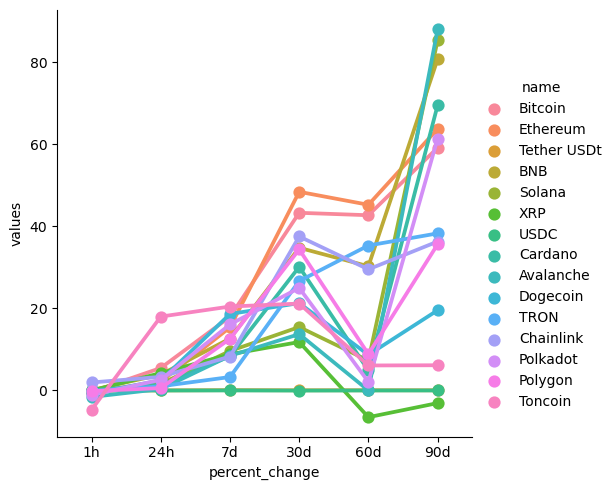

In [63]:
sns.catplot(x = 'percent_change', y = "values", hue = "name", data = df7, kind = "point")

In [66]:
df8 = df2[['name', 'quote.USD.price', 'timestamp']]

df8 = df8.query("name == 'Bitcoin'")

df8

,name,quote.USD.price,timestamp
0,Bitcoin,60168.91683,2024-02-28 16:32:33.851206
15,Bitcoin,60090.03227,2024-02-28 16:33:35.642794
30,Bitcoin,60014.27378,2024-02-28 16:34:36.572880


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

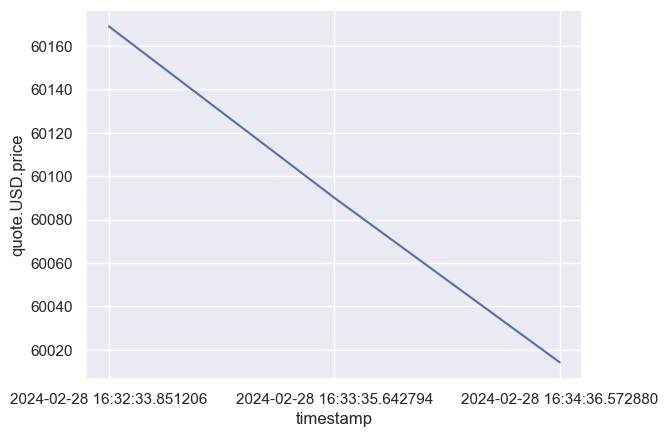

In [70]:
sns.set_theme(style = "darkgrid")

sns.lineplot(x = 'timestamp', y = 'quote.USD.price', data = df8)